In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mydef

In [394]:
path ='./data/healthcare-dataset-stroke-data.csv'
raw_df = pd.read_csv(path)

In [395]:
df = raw_df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [396]:
move_df = df['age']
df = df.drop(['age'],axis =1)
df.insert(9, 'age', move_df)

In [397]:
id_df = df['id'] 
df = df.drop(['id'], axis= 1)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   age                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [399]:
mydef.find_percent_missing_data(df)

gender: 0.0% 
hypertension: 0.0% 
heart_disease: 0.0% 
ever_married: 0.0% 
work_type: 0.0% 
Residence_type: 0.0% 
avg_glucose_level: 0.0% 
bmi: 3.9334637964774952% 
age: 0.0% 
smoking_status: 0.0% 
stroke: 0.0% 


In [400]:
x = df.iloc[ : , 0:-1].values
y =df.iloc[:, -1].values

In [401]:
x

array([['Male', 0, 1, ..., 36.6, 67.0, 'formerly smoked'],
       ['Female', 0, 0, ..., nan, 61.0, 'never smoked'],
       ['Male', 0, 1, ..., 32.5, 80.0, 'never smoked'],
       ...,
       ['Female', 0, 0, ..., 30.6, 35.0, 'never smoked'],
       ['Male', 0, 0, ..., 25.6, 51.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 26.2, 44.0, 'Unknown']], dtype=object)

In [402]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [403]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')

In [404]:
# bmi index = 7
x[:, 7:8]

array([[36.6],
       [nan],
       [32.5],
       ...,
       [30.6],
       [25.6],
       [26.2]], dtype=object)

In [405]:
x[:, 7:8]= impute.fit_transform(x[:, 7:8])
x

array([['Male', 0, 1, ..., 36.6, 67.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 28.893236911794666, 61.0, 'never smoked'],
       ['Male', 0, 1, ..., 32.5, 80.0, 'never smoked'],
       ...,
       ['Female', 0, 0, ..., 30.6, 35.0, 'never smoked'],
       ['Male', 0, 0, ..., 25.6, 51.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 26.2, 44.0, 'Unknown']], dtype=object)

# Feature Engineering

In [406]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,age,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.6,67.0,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,61.0,never smoked,1
2,Male,0,1,Yes,Private,Rural,105.92,32.5,80.0,never smoked,1
3,Female,0,0,Yes,Private,Urban,171.23,34.4,49.0,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,79.0,never smoked,1


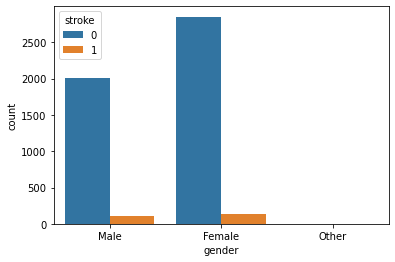

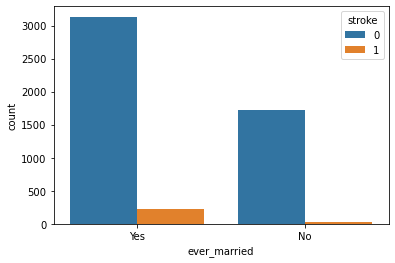

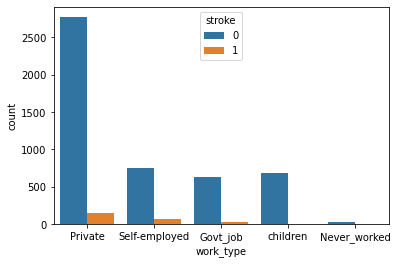

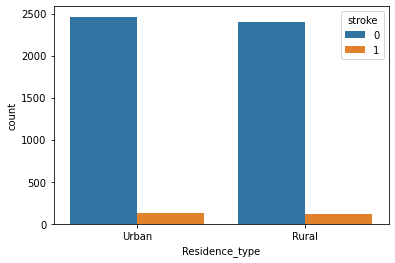

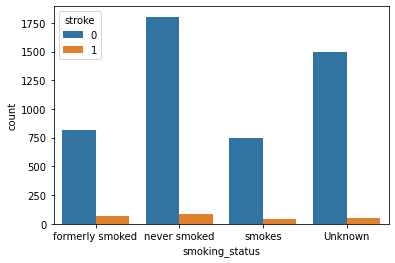

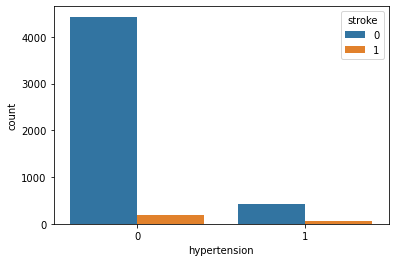

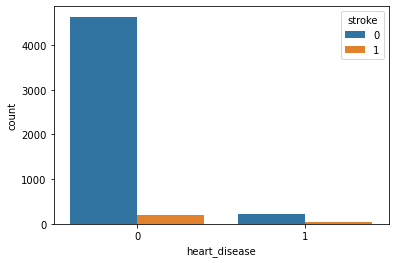

In [407]:
list_category_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease',]
for col in list_category_column:
    if col =='stroke':
        break
    plt.figure()
    sns.countplot(data =df, x=col, hue = 'stroke');

In [408]:
# Drop other
list_other_index = list(df[df['gender'] == 'Other'].index)
df = df.drop([index for index in list_other_index], axis= 0)

In [409]:
df.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'age', 'smoking_status',
       'stroke'],
      dtype='object')

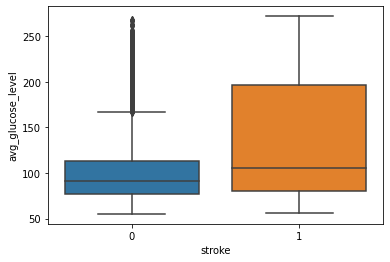

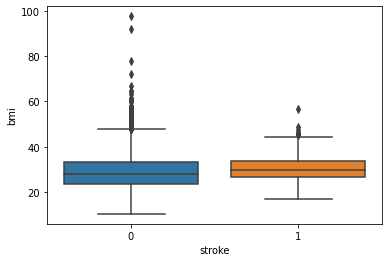

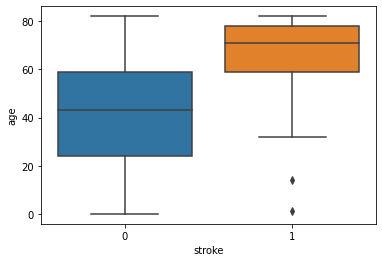

In [410]:
list_numberic_column = [ 'avg_glucose_level', 'bmi', 'age']
for col in list_numberic_column:
    plt.figure()
    sns.boxplot(data =df, x = 'stroke', y =col, );

<Figure size 432x288 with 0 Axes>

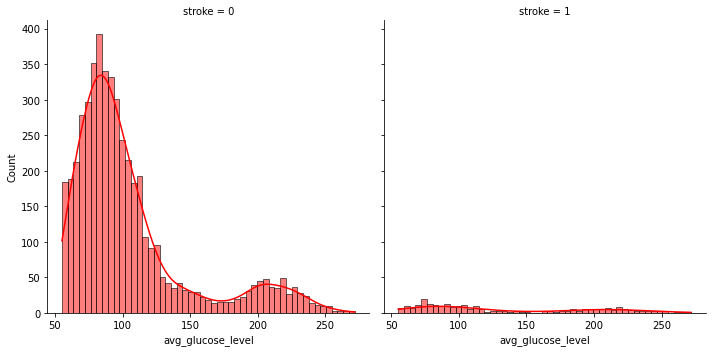

<Figure size 432x288 with 0 Axes>

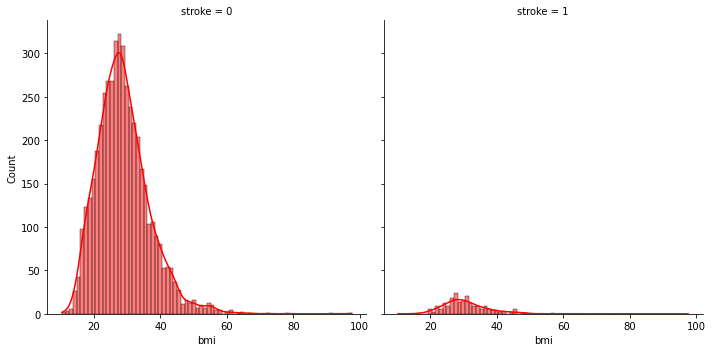

<Figure size 432x288 with 0 Axes>

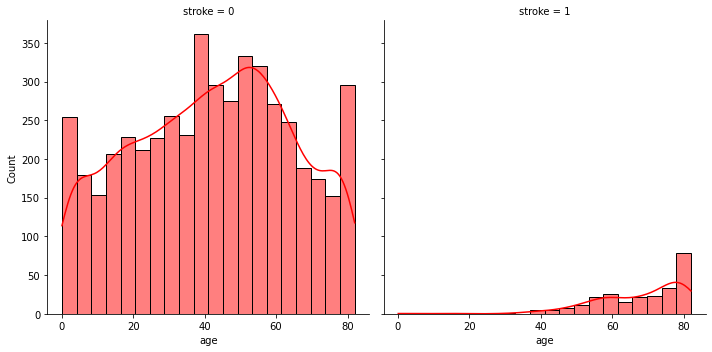

In [411]:
for col in list_numberic_column:
    plt.figure();
    sns.displot(data =df, x = col, col ='stroke', kde =True, color = 'Red');

### data Bias

# Encode Categorical Data
## 1: Encode  Independent variable (X)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   hypertension       5109 non-null   int64  
 2   heart_disease      5109 non-null   int64  
 3   ever_married       5109 non-null   object 
 4   work_type          5109 non-null   object 
 5   Residence_type     5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                4908 non-null   float64
 8   age                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.0+ KB


In [413]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 0, 4, 5, 6, 9 is column index of gender, ever_married, work_type, Residence_type, smoking_status
list_column_index = [0, 3, 4, 5, 9]

gender = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [col for col in list_column_index] )], remainder = "passthrough")
x = (gender.fit_transform(x))

In [414]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       1.0, 0.0, 0.0, 0, 1, 228.69, 36.6, 67.0], dtype=object)

## 2: Encode Dependent Variable (y)

In [415]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

## Splitting the dataset (x =data, y = output) into the Training set and Test set

In [416]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# 80 % train and 20 % test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2 )

## Feature Scaling by StandardScaler

In [417]:
from sklearn.preprocessing import StandardScaler

x_train[: , 18:] = StandardScaler().fit_transform(x_train[: , 18:])
x_train

array([[0.0, 1.0, 0.0, ..., 0.1355930729326781, -0.058016092364878195,
        1.584154724026188],
       [1.0, 0.0, 0.0, ..., -0.39745712834911634, 0.9474622873748086,
        0.8297076566842777],
       [1.0, 0.0, 0.0, ..., -1.0287007877617673, 0.6123028274615803,
        -0.9898411527873883],
       ...,
       [1.0, 0.0, 0.0, ..., -0.20107021208740247, -1.4373261773923978,
        -1.8703252596146531],
       [0.0, 1.0, 0.0, ..., 1.964446230619887, 0.26425261909014974,
        1.6285339632815945],
       [1.0, 0.0, 0.0, ..., -0.13816502797232222, 2.7521670715229654,
        0.1196398285977739]], dtype=object)

In [418]:
x_test[: , 18:] = StandardScaler().fit_transform(x_test[: , 18:])
x_test

array([[0.0, 1.0, 0.0, ..., -0.9138755729909107, -0.7608241830609749,
        -0.5200363724822472],
       [0.0, 1.0, 0.0, ..., -0.9038414292542102, -0.049139149049369106,
        -0.12727539473007526],
       [1.0, 0.0, 0.0, ..., -0.6956329467176812, -0.8279642806092395,
        -1.5237588711822423],
       ...,
       [0.0, 1.0, 0.0, ..., 0.3278497144257395, 0.23284926065334227,
        0.2654855830220967],
       [1.0, 0.0, 0.0, ..., 0.5406191713880415, -0.5056918123775692,
        0.5709663434960083],
       [0.0, 1.0, 0.0, ..., 0.033894912684681255, -0.18341934414589847,
        1.531048733556873]], dtype=object)